In [1]:
import pandas as pd
import numpy as np
import warnings
from PIL import Image
warnings.filterwarnings("ignore")

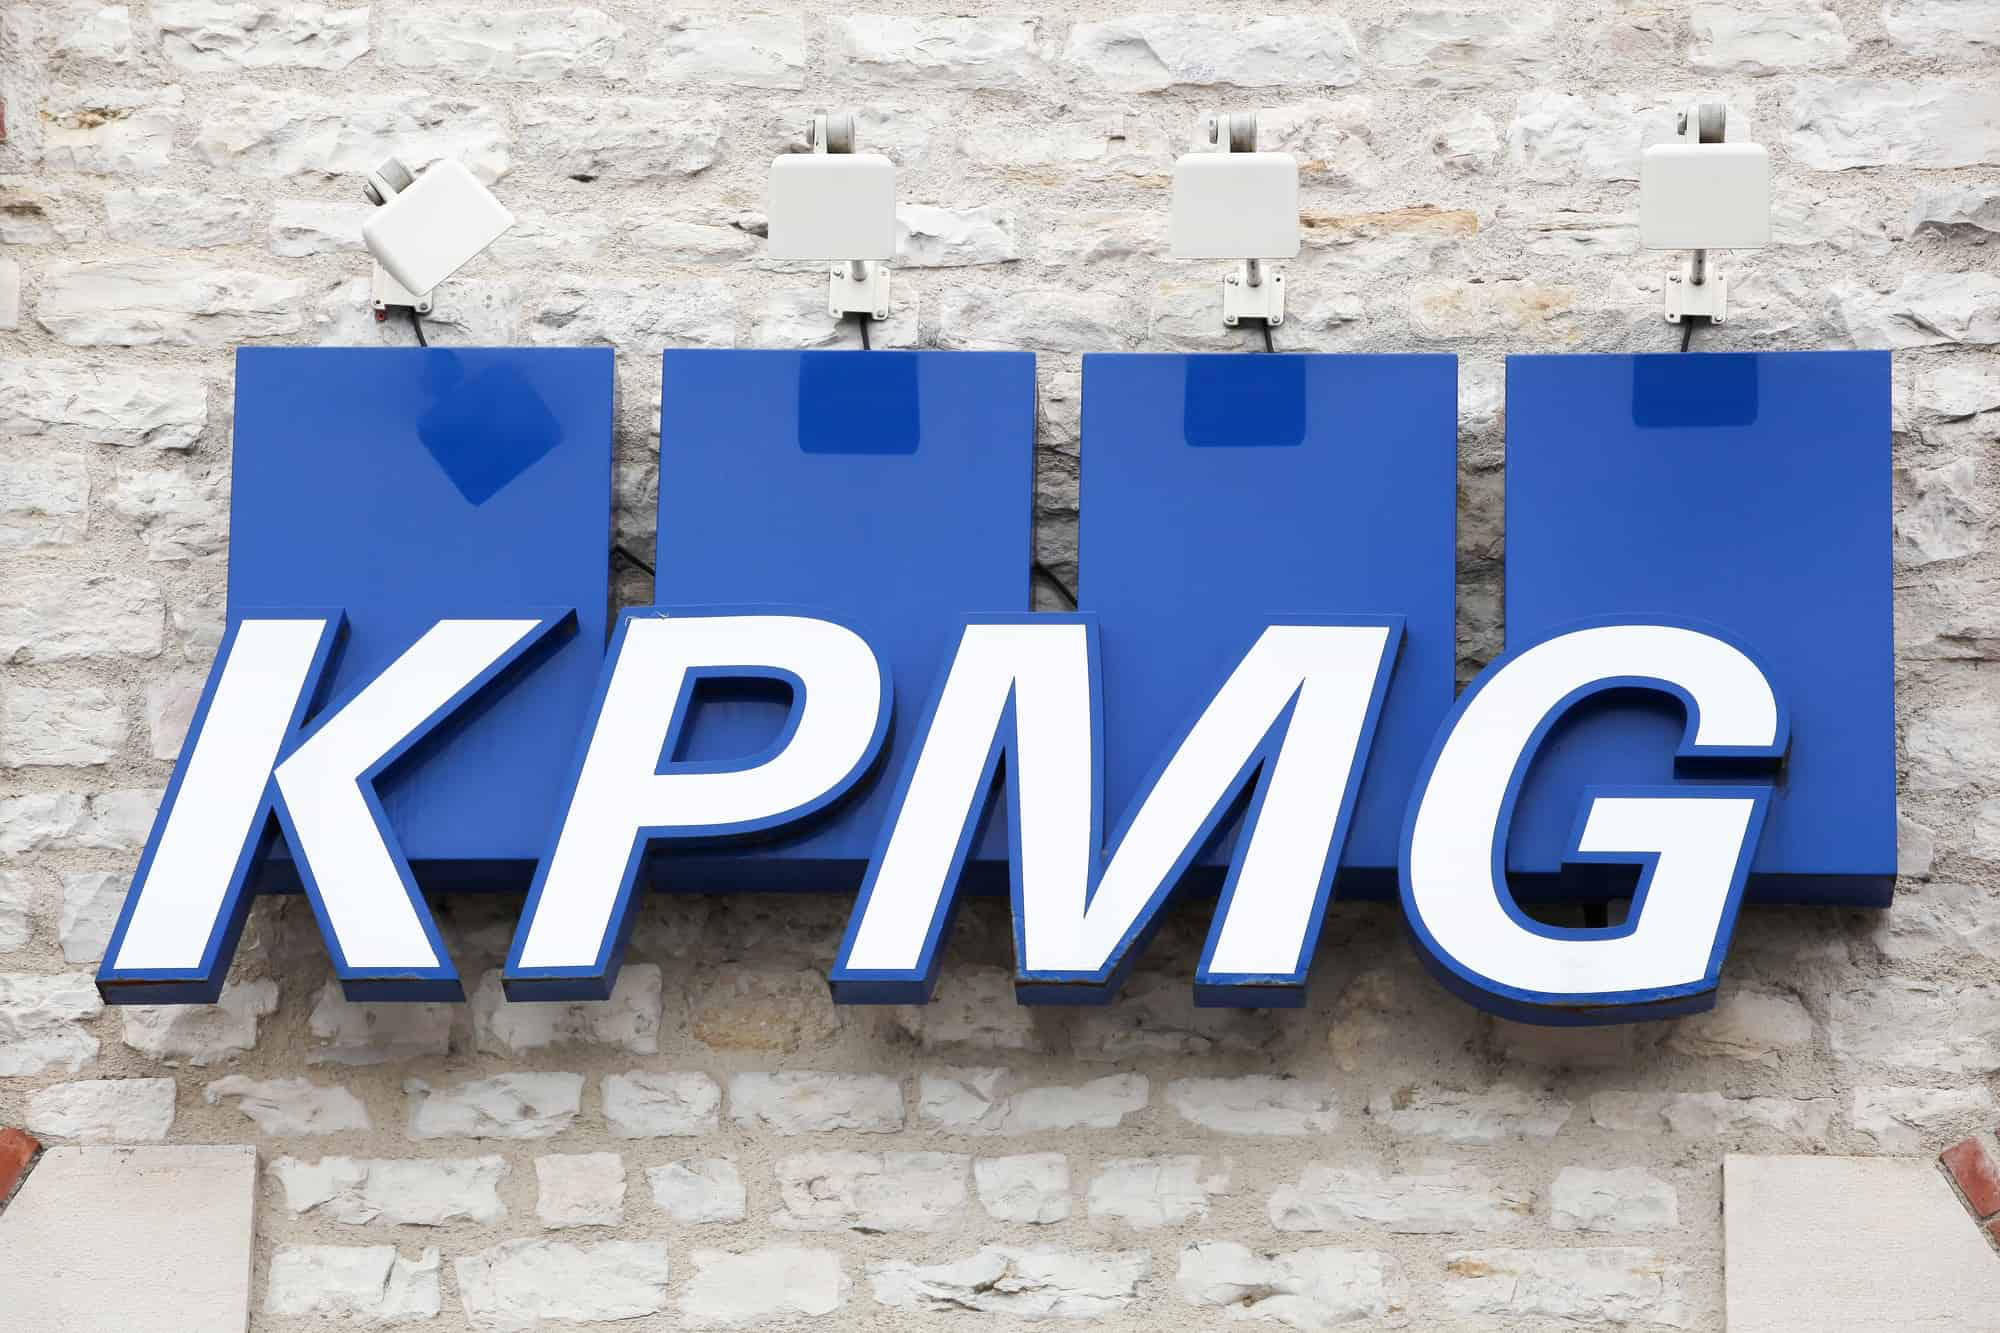

In [3]:
Image.open("G:\KPMG.jpg")

In [4]:
## Creating a dataframe from the raw excel file having multiple sheets

df = pd.read_excel("G:\\PROJECTS\\KPMG INTERN\KPMG_RAWDATA.xlsx",sheet_name = None)

In [3]:
## Fetchng the different sheet names in the dataframe

for sheet_name, xx in df.items():
    print(f"Sheet Name: {sheet_name}")

Sheet Name: Title Sheet
Sheet Name: Transactions
Sheet Name: NewCustomerList
Sheet Name: CustomerDemographic
Sheet Name: CustomerAddress


In [5]:
### Extracting the differrnt sheets in differnt datdframes

Transactions_df = pd.read_excel("G:\\PROJECTS\\KPMG INTERN\KPMG_RAWDATA.xlsx",sheet_name = "Transactions")
NewCustomerList_df = pd.read_excel("G:\\PROJECTS\\KPMG INTERN\KPMG_RAWDATA.xlsx",sheet_name = "NewCustomerList")
CustomerDemographic_df = pd.read_excel("G:\\PROJECTS\\KPMG INTERN\KPMG_RAWDATA.xlsx",sheet_name = "CustomerDemographic")
CustomerAddress_df = pd.read_excel("G:\\PROJECTS\\KPMG INTERN\KPMG_RAWDATA.xlsx",sheet_name = "CustomerAddress")

## Data Exploration and Data Cleaning

In [6]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19641 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
Transactions_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               359
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [10]:
### Checking the all the null values in "online_order" column

Transactions_df[Transactions_df["online_order"].isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2003-08-05
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,2015-05-21
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1997-01-25
336,337,82,1615,2017-10-30,NaN,Approved,Norco Bicycles,Standard,high,medium,1148.64,689.18,2013-09-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,2013-03-12
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2012-06-04
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,2004-01-16


In [11]:
### Filling the null_values in "Online_order" with "NONE" as it has only True/False values
 
Transactions_df["online_order"].fillna(value = "NONE",inplace = True)

In [12]:
Transactions_df["online_order"].value_counts()

online_order
1.0                       9829
0.0                       9811
NONE                       359
8.888888888888871e+107       1
Name: count, dtype: int64

In [13]:
### Fetching the row having irrelevant value

Transactions_df.loc[Transactions_df["online_order"]==8.888888888888871e+107]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,8888888888888871084115692253482118457762544980...,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2003-07-21


In [14]:
### Droping the unnecessary row

Transactions_df.drop(index = 97,inplace = True)

In [15]:
Transactions_df["online_order"].value_counts()

online_order
1.0     9829
0.0     9811
NONE     359
Name: count, dtype: int64

In [16]:
Transactions_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [17]:
Transactions_df.shape

(19999, 13)

In [18]:
### Creating a dataframe with null values present in "brand" for better understanding

Transactions_df[Transactions_df["brand"].isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


In [19]:
### Droping all the null values present

Transactions_df.dropna(how = "any",ignore_index = True,inplace = True)

In [20]:
Transactions_df.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [21]:
### Checking the "CustomerDemographic" dataframe

CustomerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [22]:
### Droping the irrelevant column "default"

CustomerDemographic_df.drop(columns = "default",inplace = True)

In [24]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3876 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [26]:
### Droping Last Name as it is not required in analysis

CustomerDemographic_df.drop(columns="last_name",inplace = True)

In [27]:
CustomerDemographic_df.isna().sum()

customer_id                              0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [28]:
### Filling the null Values with "None" and "0"

CustomerDemographic_df["job_title"].fillna(value = "None", inplace = True)
CustomerDemographic_df["job_industry_category"].fillna(value = "None", inplace= True)
CustomerDemographic_df["tenure"].fillna(value = 0 , inplace= True)

In [29]:
CustomerDemographic_df.isna().sum()

customer_id                             0
first_name                              0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
dtype: int64

In [113]:
Transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03


In [30]:
### Mering the both dataframe into one for better analysis

working_df = Transactions_df.merge(CustomerDemographic_df, how = "left", left_on = "customer_id", right_on = "customer_id" )

In [31]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19802 non-null  int64         
 1   product_id                           19802 non-null  int64         
 2   customer_id                          19802 non-null  int64         
 3   transaction_date                     19802 non-null  datetime64[ns]
 4   online_order                         19802 non-null  object        
 5   order_status                         19802 non-null  object        
 6   brand                                19802 non-null  object        
 7   product_line                         19802 non-null  object        
 8   product_class                        19802 non-null  object        
 9   product_size                         19802 non-null  object        
 10  list_price

In [32]:
### Checking the null values against the "Gender" column

working_df[working_df["gender"].isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
8625,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16536,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17296,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
## Droping the null values

working_df.dropna(subset = "gender",inplace = True )

In [35]:
working_df.isna().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                    438
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int6

In [37]:
### Droping the rows with null values in "DOB"

working_df.dropna(subset="DOB",inplace = True)

In [38]:
working_df.isna().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [39]:
working_df.shape

(19361, 23)

In [51]:
### Checking the values in "gender" column

working_df["gender"].value_counts()

gender
Female    9920
Male      9433
U            8
Name: count, dtype: int64

In [49]:
### Replacing the values with "Female" and "Male"

working_df["gender"].replace(["F","Femal"],"Female",inplace = True)
working_df["gender"].replace("M","Male",inplace = True)



In [50]:
working_df["gender"].value_counts()

gender
Female    9920
Male      9433
U            8
Name: count, dtype: int64

In [52]:
### Exploring the "CustomerAddress" Dataframe

CustomerAddress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [53]:
CustomerAddress_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [62]:
CustomerAddress_df["country"].value_counts()

country
Australia    3999
Name: count, dtype: int64

In [54]:
CustomerAddress_df["state"].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [64]:
### Replacing the state names with the "NSW" & "VIC"

CustomerAddress_df["state"].replace(["New South Wales","Victoria"],["NSW","VIC"],inplace = True)

In [65]:
CustomerAddress_df["state"].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [67]:
### Merging the all relevent columns in a single dataframe

KPMG_WORKING_FILE = working_df.merge(CustomerAddress_df[["customer_id","postcode","state"]], how = "inner",on = "customer_id")

In [68]:
KPMG_WORKING_FILE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19334 entries, 0 to 19333
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19334 non-null  int64         
 1   product_id                           19334 non-null  int64         
 2   customer_id                          19334 non-null  int64         
 3   transaction_date                     19334 non-null  datetime64[ns]
 4   online_order                         19334 non-null  object        
 5   order_status                         19334 non-null  object        
 6   brand                                19334 non-null  object        
 7   product_line                         19334 non-null  object        
 8   product_class                        19334 non-null  object        
 9   product_size                         19334 non-null  object        
 10  list_price

In [69]:
KPMG_WORKING_FILE.state.isna().sum()

0

In [80]:
### Exporting the "KPMG_WORKING_FILE"

import os
os.makedirs('G:\PROJECTS\KPMG INTERN', exist_ok=True)
KPMG_WORKING_FILE.to_csv('G:\PROJECTS\KPMG INTERN/KPMG_WORKING_FILE.csv',index = True)

In [82]:
KPMG_WORKING_FILE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19334 entries, 0 to 19333
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19334 non-null  int64         
 1   product_id                           19334 non-null  int64         
 2   customer_id                          19334 non-null  int64         
 3   transaction_date                     19334 non-null  datetime64[ns]
 4   online_order                         19334 non-null  object        
 5   order_status                         19334 non-null  object        
 6   brand                                19334 non-null  object        
 7   product_line                         19334 non-null  object        
 8   product_class                        19334 non-null  object        
 9   product_size                         19334 non-null  object        
 10  list_price

In [83]:
### Exploring the "NewCustomerList"

NewCustomerList_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [84]:
NewCustomerList_df.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [85]:
### Filling the Null values as "None"

NewCustomerList_df["job_title"].fillna(value="None",inplace = True)
NewCustomerList_df["job_industry_category"].fillna(value="None",inplace = True)
NewCustomerList_df["last_name"].fillna(value="None",inplace = True)

In [86]:
NewCustomerList_df.isna().sum()

first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Unnamed: 16                             0
Unnamed: 17                             0
Unnamed: 18                             0
Unnamed: 19                             0
Unnamed: 20                             0
Rank                                    0
Value                                   0
dtype: int64

In [87]:
### Droping the unwanted columns

NewCustomerList_df.drop(columns = ["Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20"] ,inplace=True)

In [90]:
NewCustomerList_df.dropna(ignore_index=True,inplace = True)

In [91]:
NewCustomerList_df.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [92]:
### Exporting the file

KPMG_WORKING_FILE.to_csv('G:\PROJECTS\KPMG INTERN/NewCustomerList.csv',index = True)